In [309]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.metrics import mean_squared_error, mean_squared_log_error as msle
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import learning_curve
import numpy as np 
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from IPython.display import display, Math
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

# Предобработка данных - чтение и очистка датасета

In [110]:
## Информация об описаниях приложения
info_data = pd.read_csv("appleStore_description.csv")

In [111]:
info_data.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [112]:
## Загрузка датасета с данными о приложении и оценках пользователей
download_data = pd.read_csv("AppleStore.csv")

In [113]:
download_data = download_data.drop("Unnamed: 0", axis = 1)
download_data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [114]:
## Удаление повторяющихся признаков в другом сете:
info_data = info_data.drop(["track_name", "size_bytes"], axis = 1)
info_data.head()

,id,app_desc
0,281656475,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Let Evernote change the way you organize your ...
2,281940292,Download the most popular free weather app pow...
3,282614216,The eBay app is the best way to find anything ...
4,282935706,On more than 250 million devices around the wo...


In [115]:
## Natural join упомянутых выше датасетов
data = pd.merge(download_data, info_data,  on = "id")

In [116]:
data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


In [117]:
## Удаление незначащих признаков 
## track_name, id, ver
d_names = dict(zip([ind for ind in range(0, len(data))], data["track_name"]))
data = data.drop(["track_name", "id", "ver"], axis = 1)
data.head()

,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,100788224,USD,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,158578688,USD,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,100524032,USD,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,128512000,USD,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,92774400,USD,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


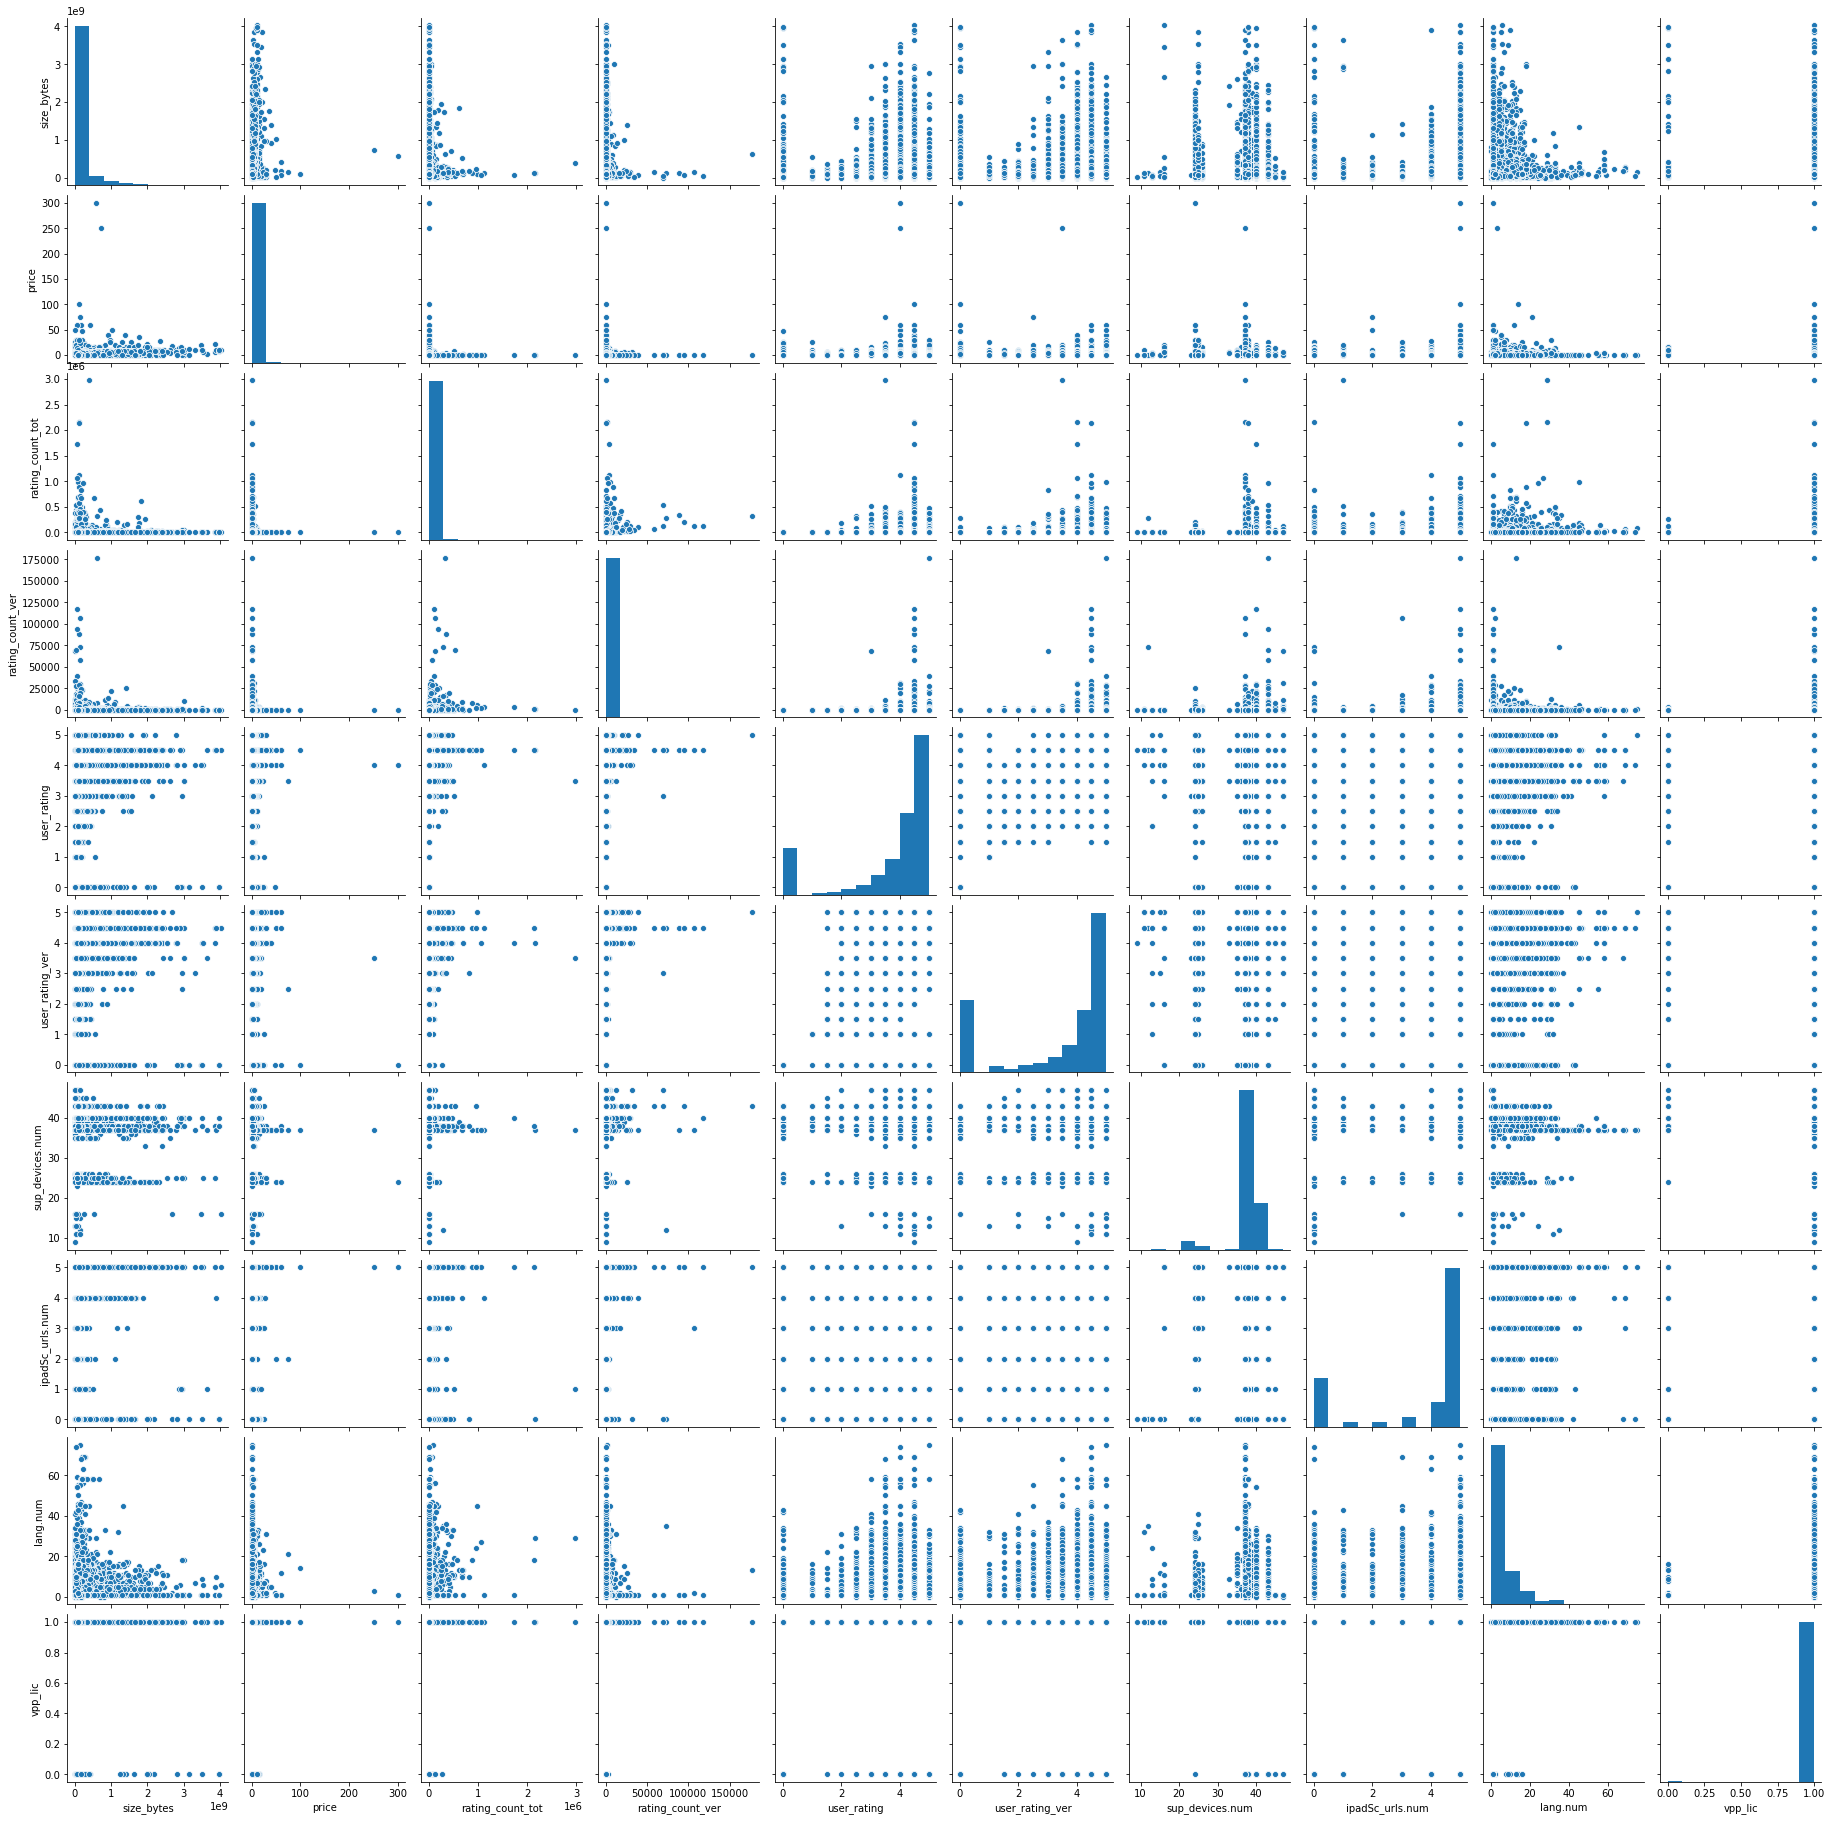

In [12]:
sns.pairplot(data)

In [118]:
## Проверка на уникальность значений: 
for feature in data: 
    unique_values_count = len(pd.unique(data[feature]).tolist())
    print("Уникальных значений в столбце " + feature + ": {}".format(unique_values_count))

Уникальных значений в столбце size_bytes: 7107
Уникальных значений в столбце currency: 1
Уникальных значений в столбце price: 36
Уникальных значений в столбце rating_count_tot: 3185
Уникальных значений в столбце rating_count_ver: 1138
Уникальных значений в столбце user_rating: 10
Уникальных значений в столбце user_rating_ver: 10
Уникальных значений в столбце cont_rating: 4
Уникальных значений в столбце prime_genre: 23
Уникальных значений в столбце sup_devices.num: 20
Уникальных значений в столбце ipadSc_urls.num: 6
Уникальных значений в столбце lang.num: 57
Уникальных значений в столбце vpp_lic: 2
Уникальных значений в столбце app_desc: 7147


In [119]:
## Столбец currency удаляется, т.к. для любого вектора, currency = USD
data = data.drop("currency", axis = 1)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,100788224,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,158578688,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,100524032,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,128512000,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,92774400,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


In [120]:
## Разделение на числовые и категориальные признаки

str_names = []
num_names = []

for feature in data: 
    if data.dtypes[feature] == "O":
        str_names.append(feature)
    else:
        num_names.append(feature)
        

In [121]:
str_names 

['cont_rating', 'prime_genre', 'app_desc']

In [122]:
num_names 

['size_bytes',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'user_rating',
 'user_rating_ver',
 'sup_devices.num',
 'ipadSc_urls.num',
 'lang.num',
 'vpp_lic']

In [123]:
num_data = pd.DataFrame({})

for feature in data:
    if feature in num_names: 
        num_data[feature] = data[feature]
        
num_data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,4.0,4.5,38,5,10,1
1,158578688,0.00,161065,26,4.0,3.5,37,5,23,1
2,100524032,0.00,188583,2822,3.5,4.5,37,5,3,1
3,128512000,0.00,262241,649,4.0,4.5,37,5,9,1
4,92774400,0.00,985920,5320,4.5,5.0,37,5,45,1


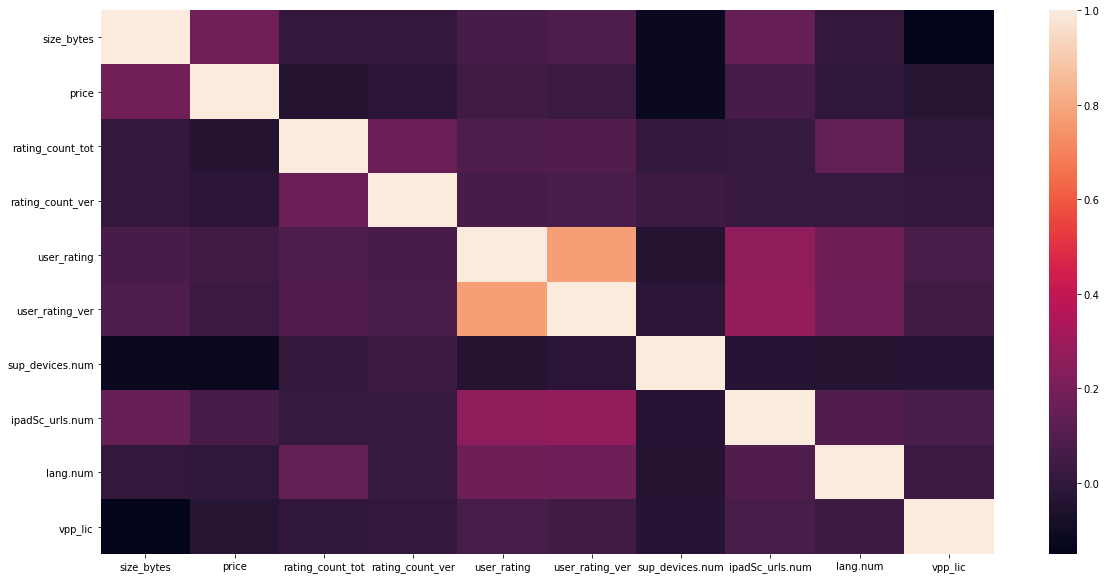

In [124]:
plt.figure(figsize=(20,10))
sns.heatmap(num_data.corr())

In [125]:
high_corr = num_data.corr()["user_rating"]["user_rating_ver"]
print("Cor(USER_RATING, USER_RATING_VER) = {}".format(high_corr))

Cor(USER_RATING, USER_RATING_VER) = 0.7741398463935544


In [126]:
## В качестве target выберем USER_RATING, 
## Причем удаляем USER_RATING_VER по причине высокой корреляции 
data = data.drop("user_rating_ver", axis = 1)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,100788224,3.99,21292,26,4.0,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,158578688,0.00,161065,26,4.0,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,100524032,0.00,188583,2822,3.5,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,128512000,0.00,262241,649,4.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,92774400,0.00,985920,5320,4.5,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


In [127]:
## Работа с категориальными и текстовыми признаками: 
## 1) Возрастное ограничение 
pd.unique(data["cont_rating"]).tolist()

['4+', '12+', '17+', '9+']

In [128]:
## Между возрастными ограничениями существует отношение порядка
## Значит, можем задать порядок 
## '4+': 0, '12+': 2, '17+': 3, '9+': 1
config = {'4+': 0, '12+': 2, '17+': 3, '9+': 1}
data["cont_rating"] = data["cont_rating"].replace(config)

In [129]:
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,100788224,3.99,21292,26,4.0,0,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,158578688,0.00,161065,26,4.0,0,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,100524032,0.00,188583,2822,3.5,0,Weather,37,5,3,1,Download the most popular free weather app pow...
3,128512000,0.00,262241,649,4.0,2,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,92774400,0.00,985920,5320,4.5,0,Reference,37,5,45,1,On more than 250 million devices around the wo...


In [130]:
## Между значениями prime_genre не существует отношения порядка: 
## Поэтому аналогичный метод применить нельзя
genres = pd.unique(data["prime_genre"]).tolist()
count_genres = len(genres)
print("Всевозможные жанры({}): ".format(count_genres))
genres

Всевозможные жанры(23): 


['Games',
 'Productivity',
 'Weather',
 'Shopping',
 'Reference',
 'Finance',
 'Music',
 'Utilities',
 'Travel',
 'Social Networking',
 'Sports',
 'Business',
 'Health & Fitness',
 'Entertainment',
 'Photo & Video',
 'Navigation',
 'Education',
 'Lifestyle',
 'Food & Drink',
 'News',
 'Book',
 'Medical',
 'Catalogs']

In [131]:
## Для prime_genre используем one_hot_encoder: 
for genre in genres:
    data[genre] = [1 if genre == data["prime_genre"][i] else 0 for i in range(len(data))] 

In [132]:
data = data.drop("prime_genre", axis = 1)

In [133]:
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,...,Entertainment,Photo & Video,Navigation,Education,Lifestyle,Food & Drink,News,Book,Medical,Catalogs
0,100788224,3.99,21292,26,4.0,0,38,5,10,1,...,0,0,0,0,0,0,0,0,0,0
1,158578688,0.00,161065,26,4.0,0,37,5,23,1,...,0,0,0,0,0,0,0,0,0,0
2,100524032,0.00,188583,2822,3.5,0,37,5,3,1,...,0,0,0,0,0,0,0,0,0,0
3,128512000,0.00,262241,649,4.0,2,37,5,9,1,...,0,0,0,0,0,0,0,0,0,0
4,92774400,0.00,985920,5320,4.5,0,37,5,45,1,...,0,0,0,0,0,0,0,0,0,0


In [134]:
data = data.drop("app_desc", axis = 1)

## Построение моделей машинного обучения

In [172]:
def show_metrics(trained_model, X_test, y_test, logarithm = True):
    data =  pd.DataFrame({
        "ModelName": [str(trained_model)],
        "RMSE": [mean_squared_error(y_test,  trained_model.predict(X_test), squared = False)],
        "LMSE": [msle(y_test, trained_model.predict(X_test)) if logarithm else "Not defined"],
        "R^2": [trained_model.score(X_test, y_test)]
    })
    return data

#### Разделение данных на признаки и target - значение

In [135]:
X = data.drop("user_rating", axis = 1)
y = data["user_rating"]

## Шкалирование данных: 
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Разделение исходных данных на тренировочные и тестовые 

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Линейные модели

In [145]:
LinModel = LinearRegression()
RidgeModel = Ridge()
LassoModel = Lasso()

In [146]:
LinModel.fit(X_train, y_train)
RidgeModel.fit(X_train, y_train)
LassoModel.fit(X_train, y_train)

Lasso()

In [153]:
show_metrics(LinModel, X_test, y_test)

,ModelName,RMSE,LMSE,R^2
0,LinearRegression(),1.432858,0.289049,0.101348


In [154]:
show_metrics(RidgeModel, X_test, y_test)

,ModelName,RMSE,LMSE,R^2
0,Ridge(),1.432857,0.289095,0.101349


In [156]:
show_metrics(LassoModel, X_test, y_test)

,ModelName,RMSE,LMSE,R^2
0,Lasso(),1.511939,0.322685,-0.000585


### Алгоритм k - ближайших соседей 

In [137]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

#### Рассмотрим коэффициент детерминации 

In [138]:
display(Math("Коэффициент\;детерминации\;R^{2}\;=\;" + str(knn.score(X_test, y_test))))

<IPython.core.display.Math object>

In [139]:
knn = KNeighborsRegressor()
params = {"n_neighbors": range(1,100,2)}
grid_knn = GridSearchCV(
    knn,
    params
)

grid_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 100, 2)})

In [143]:
n_neighbor = grid_knn.best_params_["n_neighbors"]
grid_knn.best_params_

{'n_neighbors': 25}

In [158]:
knn = KNeighborsRegressor(
    n_neighbors = n_neighbor)

knn.fit(X_train, y_train)
show_metrics(knn, X_test, y_test)

,ModelName,RMSE,LMSE,R^2
0,KNeighborsRegressor(n_neighbors=25),1.392731,0.267961,0.150976


### Алгоритм Decision Tree

In [159]:
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [160]:
show_metrics(DTregressor, X_test, y_test)

,ModelName,RMSE,LMSE,R^2
0,DecisionTreeRegressor(),0.845467,0.039567,0.687119


In [161]:
features_count = len([x for x in data])

parametres = {
    "max_depth": range(1,10), 
    "max_features": range(1, features_count)
}

DT = DecisionTreeRegressor()
DTgrid = GridSearchCV(
    DT,
    parametres
)
DTgrid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'max_features': range(1, 33)})

In [162]:
DTgrid.best_params_

{'max_depth': 5, 'max_features': 31}

In [163]:
DT_optimal = DecisionTreeRegressor(
    max_depth = 5, 
    max_features = 31
)
DT_optimal.fit(X_train, y_train)

show_metrics(DT_optimal, X_test, y_test)

,ModelName,RMSE,LMSE,R^2
0,"DecisionTreeRegressor(max_depth=5, max_feature...",0.627412,0.022162,0.827698


### Алгоритм RandomForest

In [164]:
RF = RandomForestRegressor(
    n_estimators = 1000,
    n_jobs = -1,
    max_depth = 5, 
    max_features = 25
)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=25, n_estimators=1000,
                      n_jobs=-1)

In [165]:
show_metrics(RF, X_test, y_test)

,ModelName,RMSE,LMSE,R^2
0,"RandomForestRegressor(max_depth=5, max_feature...",0.613258,0.021219,0.835384


In [166]:
RF = RandomForestRegressor()
parametres = {
    "max_depth": range(1,10), 
    "max_features": range(1, features_count)
}
RFGrid = GridSearchCV(RF, parametres)
RFGrid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'max_features': range(1, 33)})

In [167]:
RFGrid.best_params_

{'max_depth': 8, 'max_features': 14}

In [168]:
RF = RandomForestRegressor(
    n_estimators = 2000,
    n_jobs = -1,
    max_depth = 8, 
    max_features = 14
)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=14, n_estimators=2000,
                      n_jobs=-1)

In [169]:
show_metrics(RF, X_test, y_test)

,ModelName,RMSE,LMSE,R^2
0,"RandomForestRegressor(max_depth=8, max_feature...",0.602208,0.020487,0.841263


### Алгоритм градиентного бустинга

In [170]:
GBR = GradientBoostingRegressor(
    n_estimators = 1000
)

GBR.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

In [173]:
show_metrics(GBR, X_test, y_test, logarithm = False)

,ModelName,RMSE,LMSE,R^2
0,GradientBoostingRegressor(n_estimators=1000),0.635691,Not defined,0.823121


In [174]:
params = {
    "max_depth": range(1,10),
    "max_features": range(1,features_count)
}

GBR = GradientBoostingRegressor()

GBRgrid = GridSearchCV(GBR, params)
GBRgrid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'max_features': range(1, 33)})

In [175]:
GBRgrid.best_params_

{'max_depth': 3, 'max_features': 26}

In [176]:
GBRoptimal = GradientBoostingRegressor(
    max_depth = 3, 
    max_features = 26
)

GBRoptimal.fit(X_train, y_train)

GradientBoostingRegressor(max_features=26)

In [179]:
show_metrics(GBRoptimal, X_test, y_test, logarithm = False)

,ModelName,RMSE,LMSE,R^2
0,GradientBoostingRegressor(max_features=26),0.608559,Not defined,0.837897


### Алгоритм Bagging 

In [180]:
BR = BaggingRegressor(
    n_estimators = 500,
    max_features = 28,
    bootstrap = True,
    n_jobs = -1
)
BR.fit(X_train, y_train)

BaggingRegressor(max_features=28, n_estimators=500, n_jobs=-1)

In [181]:
show_metrics(BR, X_test, y_test)

,ModelName,RMSE,LMSE,R^2
0,"BaggingRegressor(max_features=28, n_estimators...",0.610804,0.023421,0.836699


### Алгоритм AdaBoost

In [183]:
AdB = AdaBoostRegressor(
    n_estimators = 100)
AdB.fit(X_test, y_test)

AdaBoostRegressor(n_estimators=100)

In [184]:
show_metrics(AdB, X_test, y_test)

,ModelName,RMSE,LMSE,R^2
0,AdaBoostRegressor(n_estimators=100),0.632725,0.021727,0.824767


# Обобщение результатов 

In [185]:
RF_pred = RF.predict(X_test)

<IPython.core.display.Javascript object>


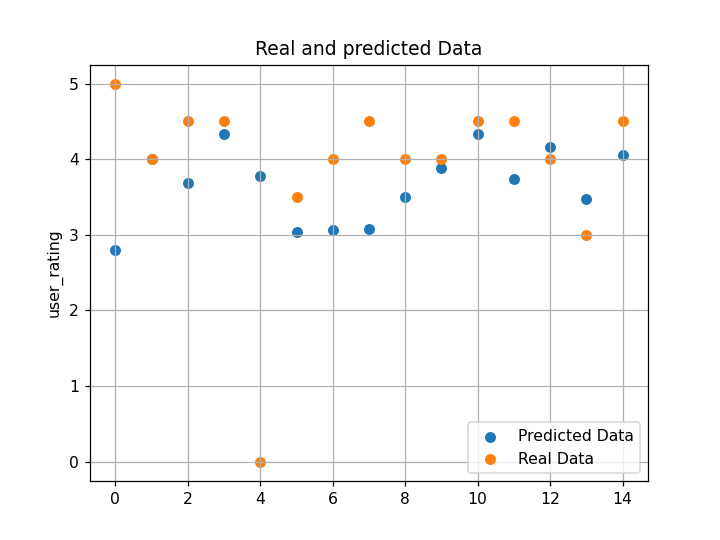

In [186]:
%matplotlib notebook
import matplotlib.pyplot as plt
n = 15
plt.title("Real and predicted Data")
plt.scatter(range(0,n), y_pred[:n], label = "Predicted Data")
plt.scatter(range(0,n), y_test[:n], label = "Real Data")
plt.ylabel("user_rating")
plt.grid()
plt.legend()

In [264]:
train_sizes, train_scores, test_scores = learning_curve(
RF,
X = X,
y = y,
n_jobs = 1
)


<IPython.core.display.Javascript object>


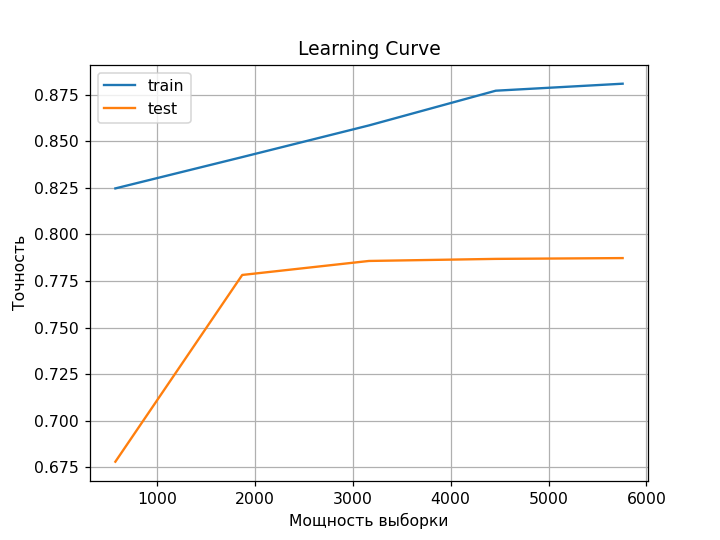

In [266]:
%matplotlib notebook 
plt.title("Learning Curve")
plt.xlabel("Мощность выборки")
plt.ylabel("Точность")
plt.grid()
plt.plot(train_sizes, np.mean(train_scores, axis = 1), label = "train")
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = "test")
plt.legend()

# Анализ временных рядов 

In [499]:
GAZP = pd.read_csv(
    "GAZP.csv",
    sep = ";"
)

droplist = ["<TICKER>", "<PER>", "<TIME>", "<VOL>"]

GAZP = GAZP.drop(droplist, axis = 1)

In [500]:
GAZP.head()

,<DATE>,<CLOSE>
0,01/03/20,259.00
1,01/06/20,256.55
2,01/08/20,255.79
3,01/09/20,254.07
4,01/10/20,251.90


In [501]:
GAZP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   <DATE>   242 non-null    object 
 1   <CLOSE>  242 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [502]:
GAZP["<DATE>"] = pd.to_datetime(GAZP["<DATE>"])

In [503]:
GAZP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   <DATE>   242 non-null    datetime64[ns]
 1   <CLOSE>  242 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


In [504]:
## Количество дней для построения прогноза: 
n = 15

In [505]:
X = np.array(GAZP_pred["<DATE>"][:-n].tolist())
y = GAZP_pred["<CLOSE>"][:-n]

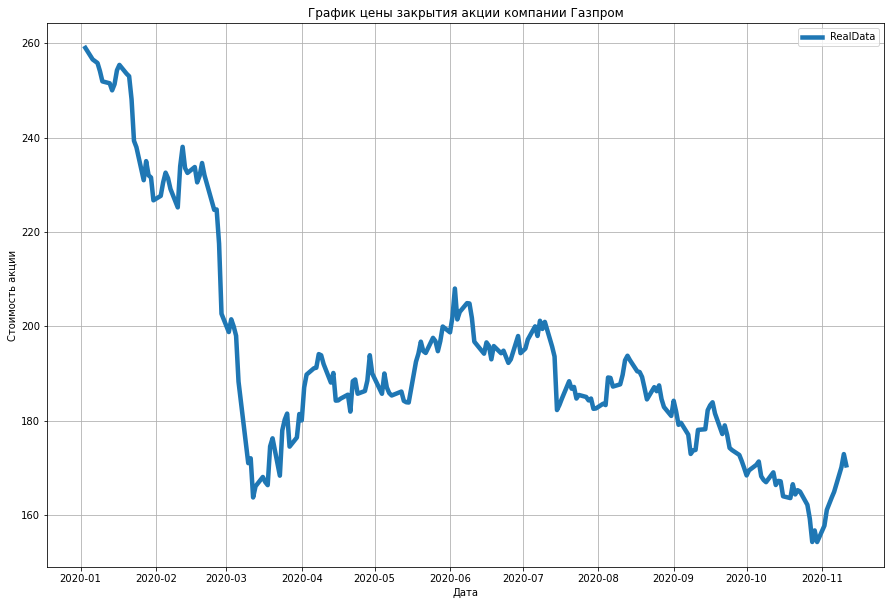

In [506]:
%matplotlib inline 
plt.figure(figsize = (15,10))
plt.title("График цены закрытия акции компании Газпром")
plt.xlabel("Дата")
plt.ylabel("Стоимость акции")
plt.grid()
plt.plot(X,y, linewidth = 4.5, label = "RealData")
plt.legend();

### Первый knn - регрессор

In [507]:
xvalues = np.array([x for x in range(len(y))])

In [508]:
knn = KNeighborsRegressor()
knn.fit(xvalues.reshape(-1,1),y)

KNeighborsRegressor()

In [509]:
pred_values = knn.predict(xvalues.reshape(-1,1))

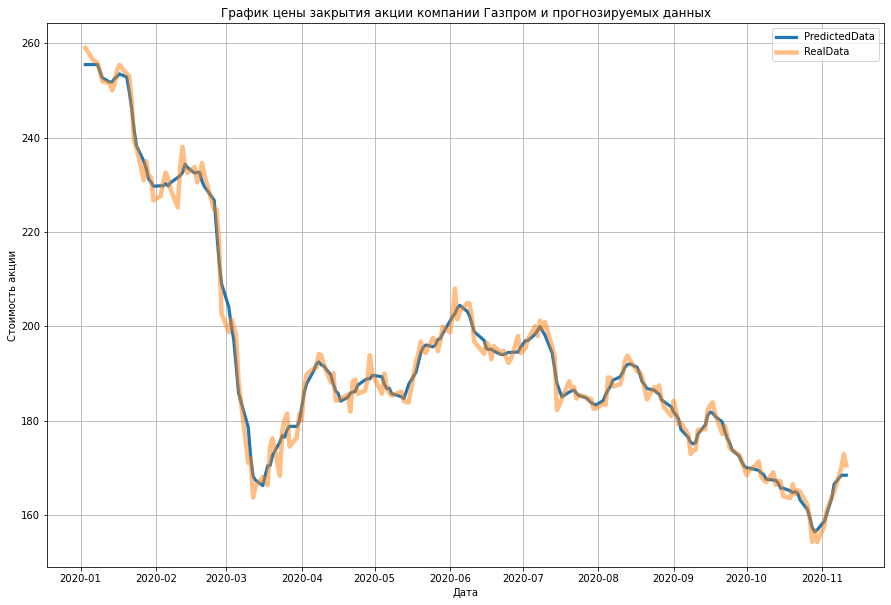

In [510]:
%matplotlib inline 
plt.figure(figsize = (15,10))
plt.title("График цены закрытия акции компании Газпром и прогнозируемых данных")
plt.xlabel("Дата")
plt.ylabel("Стоимость акции")
plt.grid()
plt.plot(X, pred_values, linewidth = 3.2, label = "PredictedData")
plt.plot(X,y, linewidth = 4.5, label = "RealData", alpha = 0.5 )
plt.legend();

In [511]:
X_test = X[-n:]
y_test = y[-n:]

xvalues = [x for x in range(len(X))]

y_test_pred = knn.predict(np.array(xvalues[-n:]).reshape(-1,1))

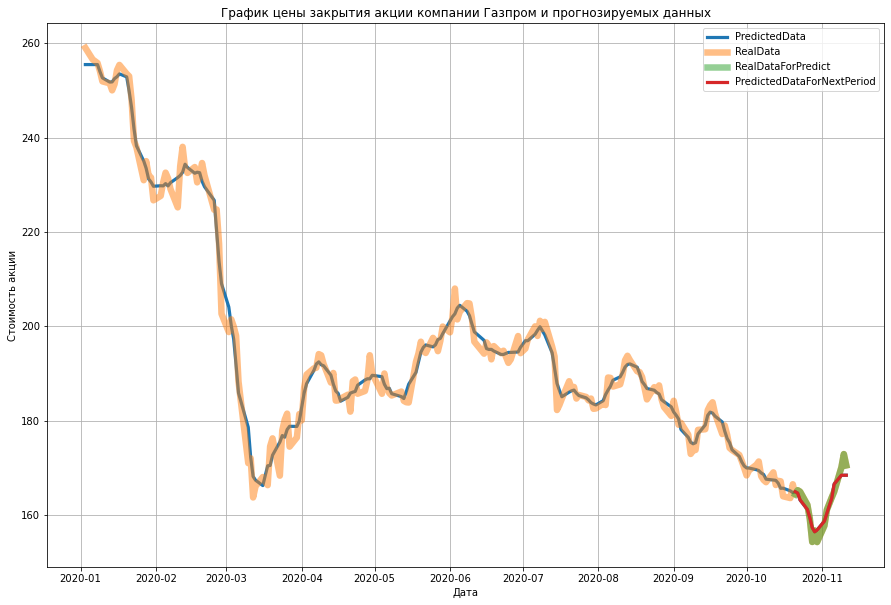

In [512]:
%matplotlib inline 
plt.figure(figsize = (15,10))
plt.title("График цены закрытия акции компании Газпром и прогнозируемых данных")
plt.xlabel("Дата")
plt.ylabel("Стоимость акции")
plt.grid()
plt.plot(X, pred_values, linewidth = 3.2, label = "PredictedData")
plt.plot(X,y, linewidth = 6.5, label = "RealData", alpha = 0.5 )
plt.plot(X_test, y_test, linewidth = 6.5, alpha = 0.5, label = "RealDataForPredict")
plt.plot(X_test, y_test_pred, linewidth = 3.2, label = "PredictedDataForNextPeriod")
plt.legend();

In [513]:
show_metrics(
    knn,
    np.array(xvalues[-n:]).reshape(-1,1),
    y_test
)

,ModelName,RMSE,LMSE,R^2
0,KNeighborsRegressor(),1.865023,0.000127,0.886032


### Второй knn - регрессор

In [517]:
xvalues = np.array([x for x in range(len(y))])

knn3 = KNeighborsRegressor(n_neighbors = 3)
knn3.fit(xvalues.reshape(-1,1),y)
pred_values = knn3.predict(xvalues.reshape(-1,1))

xvalues = [x for x in range(len(X))]
y_test_pred = knn3.predict(np.array(xvalues[-n:]).reshape(-1,1))

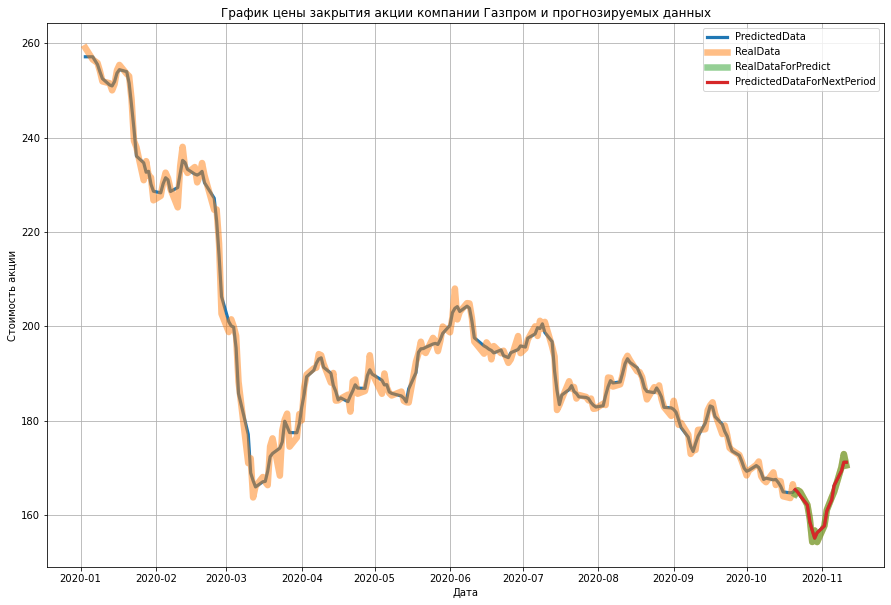

In [518]:
%matplotlib inline 
plt.figure(figsize = (15,10))
plt.title("График цены закрытия акции компании Газпром и прогнозируемых данных")
plt.xlabel("Дата")
plt.ylabel("Стоимость акции")
plt.grid()
plt.plot(X, pred_values, linewidth = 3.2, label = "PredictedData")
plt.plot(X,y, linewidth = 6.5, label = "RealData", alpha = 0.5 )
plt.plot(X_test, y_test, linewidth = 6.5, alpha = 0.5, label = "RealDataForPredict")
plt.plot(X_test, y_test_pred, linewidth = 3.2, label = "PredictedDataForNextPeriod")
plt.legend();

In [519]:
show_metrics(
    DT,
    np.array(xvalues[-n:]).reshape(-1,1),
    y_test
)

,ModelName,RMSE,LMSE,R^2
0,KNeighborsRegressor(n_neighbors=3),1.183057,0.000054,0.954141


### Объединение моделей в ансамбль

In [523]:
from sklearn.ensemble import VotingRegressor

In [532]:
knn = KNeighborsRegressor(n_neighbors = 1)
knn3 = KNeighborsRegressor(n_neighbors = 3)
VR = VotingRegressor([("knn", knn),("knn3",knn3)])

In [533]:
xvalues = np.array([x for x in range(len(y))])
VR.fit(xvalues.reshape(-1,1),y)

VotingRegressor(estimators=[('knn', KNeighborsRegressor(n_neighbors=1)),
                            ('knn3', KNeighborsRegressor(n_neighbors=3))])

In [535]:
pred_values = VR.predict(xvalues.reshape(-1,1))

xvalues = [x for x in range(len(X))]
y_test_pred = VR.predict(np.array(xvalues[-n:]).reshape(-1,1))

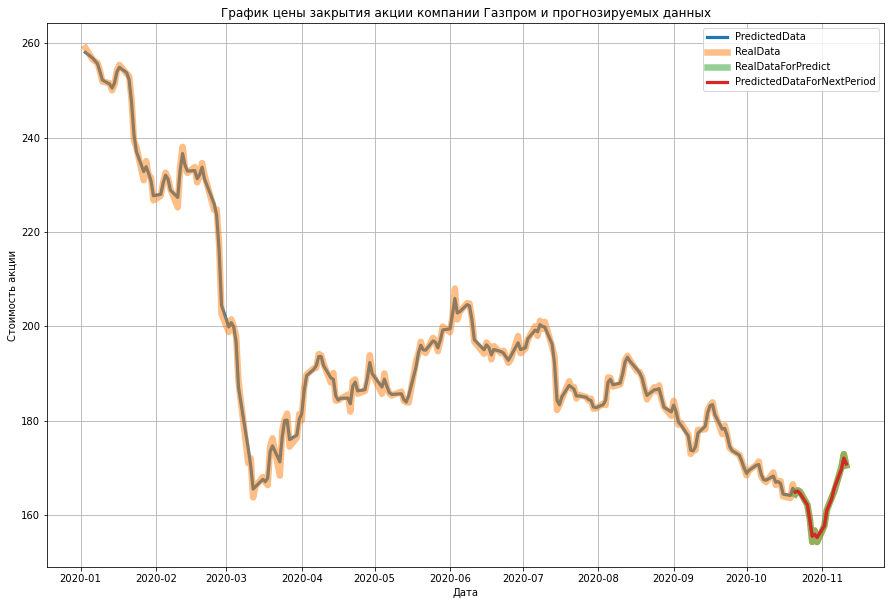

In [536]:
%matplotlib inline 
plt.figure(figsize = (15,10))
plt.title("График цены закрытия акции компании Газпром и прогнозируемых данных")
plt.xlabel("Дата")
plt.ylabel("Стоимость акции")
plt.grid()
plt.plot(X, pred_values, linewidth = 3.2, label = "PredictedData")
plt.plot(X,y, linewidth = 6.5, label = "RealData", alpha = 0.5 )
plt.plot(X_test, y_test, linewidth = 6.5, alpha = 0.5, label = "RealDataForPredict")
plt.plot(X_test, y_test_pred, linewidth = 3.2, label = "PredictedDataForNextPeriod")
plt.legend();

In [534]:
show_metrics(
    VR, 
    np.array(xvalues[-n:]).reshape(-1,1),
    y_test
)    

,ModelName,RMSE,LMSE,R^2
0,"VotingRegressor(estimators=[('knn', KNeighbors...",0.591528,0.000014,0.988535
